In [ ]:
# Statistics and probability concluding exercise

In [ ]:
# Exercise 5.2

In [2]:
# imports

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.stats import uniform

In [1]:
# prepare distrubution

In [4]:
# Select distribution

# https://www.datacamp.com/community/tutorials/probability-distributions-python

# random numbers from uniform distribution


n = 10000
start_1 = -10
width_1 = 20
data_uniform_1 = uniform.rvs(size=n, loc = start_1, scale=width_1)

mu_1 = start_1 + width_1 / 2
sigma_1 = np.sqrt(width_1 / 12)a


In [5]:
start_2 = 10
width_2 = 30
data_uniform_2 = uniform.rvs(size=n, loc = start_2, scale=width_2)

mu_2 = start_2 + width_2 / 2
sigma_2 = np.sqrt(width_2 / 12)

In [7]:
dist_array = [data_uniform_1, data_uniform_2]
dist_name = ["uniform 1", "uniform 2"]

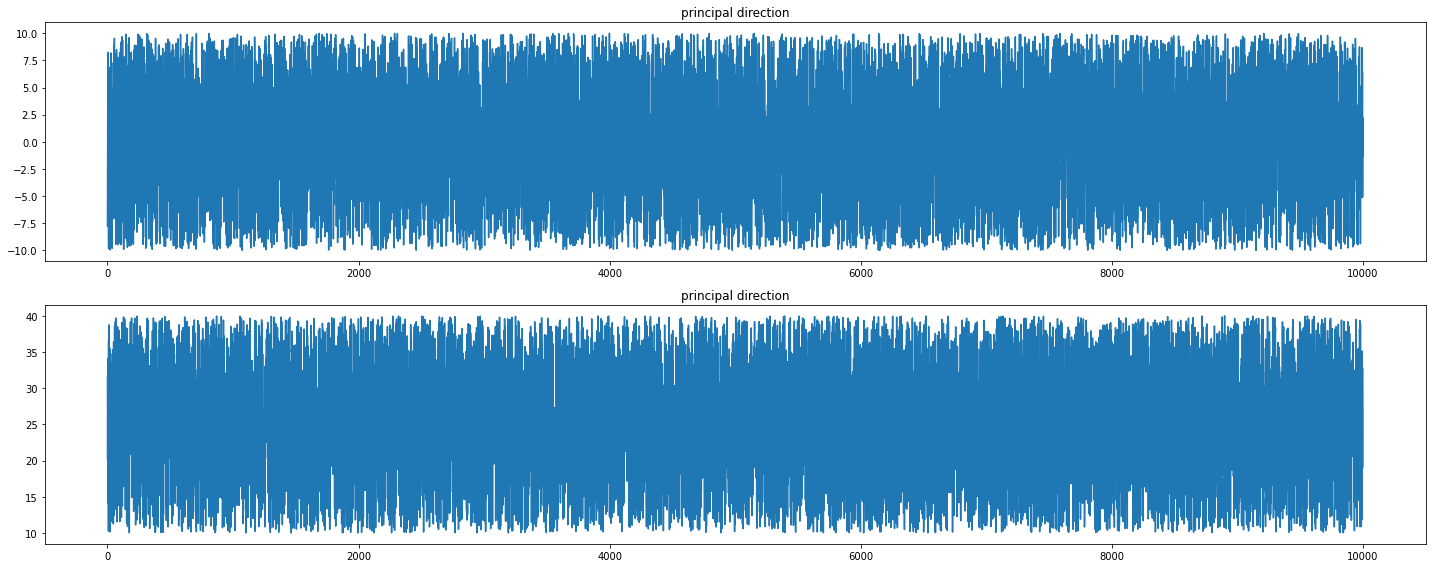

In [9]:
fig, _ = plt.subplots(2, 1, figsize=(20,8))

for kk, ax in zip(range(2), fig.axes):
    dist = dist_array[kk]
    ax.plot(dist)
    ax.set_title(dist_name[kk])

plt.tight_layout()
plt.show()

In [ ]:
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html

random_100 = np.random.choice(data_uniform, 100)

print(np.mean(random_100))


1.0618648838419147


In [ ]:
x_bar = np.zeros(1000)

for i in range(len(x_bar)):
    random_100 = np.random.choice(data_uniform, 100)
    x_bar[i] = np.mean(random_100)

x_tilda = (x_bar - mu) / (sigma / np.sqrt(n))

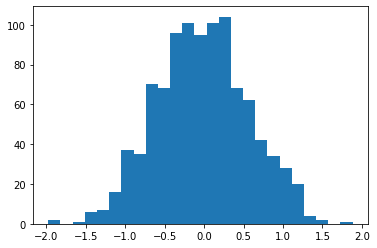

In [ ]:
# https://numpy.org/doc/stable/reference/generated/numpy.histogram.html


plt.hist(x_bar, bins='auto')
plt.show()

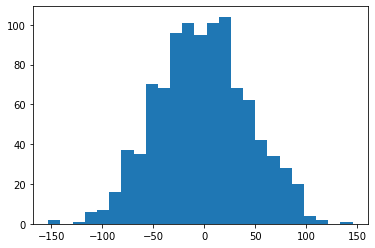

In [ ]:
plt.hist(x_tilda, bins='auto')
plt.show()

c:\Courses\Python_for_AI_Engineer\Probability\exercise\.venv\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


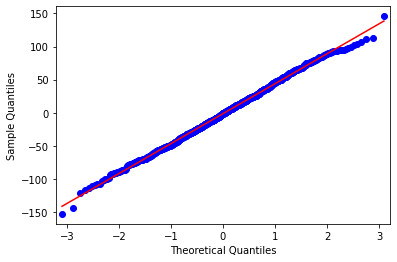

In [ ]:
import statsmodels.api as sm

sm.qqplot(x_tilda,line='r') 
plt.show()
    

In [ ]:
# according the CLT,
# The sample averages will converge to the N(0,1) as we take more samples,
# And indeed for n=1000 the distribution of x tilda (normalized x) is closer to the N(0,1).

In [ ]:
# Q 6.2

import numpy as np
import scipy.stats

# wait_time ~ U[0, theta]

wait_time = np.array([2, 7, 5, 11, 1])

# 6.2.1: Find the ML for theta 
# theta = theta(ML) = Xn = max(wait_time) = 11

# 6.2.2: Find the quantile function Qp
# Since it is uniform distribution, the Q is simply Qp = theta*p = 11p

# 6.2.3: Construct a confidence level of 0.95:

# theta = 11
# Find p1, p2 such that 0 <= p1 <= p2 <= 1, p2-p2 = 1 - alpha = 0.95
# p1 = 0.025
# p2 = 0.975

# 1. Find ML for theta: theta = 11 (from section 6.2.1)
# 2. Qp = 11*p (from section 6.2.2)
# 3. Qp1 = 11*0.025 = 0.275
# 4. Qp2 = 11*0.975 = 10.725

# Confidence Intrval = [0.275, 10.725]

In [ ]:
 # 10.1

 # 10.1.1 Build confidence range for the mean diffenceses

data_frame = pd.read_csv('Advertising.csv')

In [ ]:
data_frame.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
mu_0 = 0
n = len(data_frame.newspaper)
d = data_frame.newspaper - data_frame.radio
d_bar = np.mean(d)
print(d_bar)

7.29


In [ ]:
# since we assume it is normal distribution, we can estimate the variance

s_d = np.sqrt((np.sum((d - d_bar) ** 2)) / (n - 1))
s_d

21.58105906930343

In [ ]:
from scipy import stats
t = stats.t.ppf(1-0.025, n - 1)
wing = t * s_d / np.sqrt(n)
print(wing)

3.0092280116543226


In [ ]:
# The confidence_range is
confidence_range = [d_bar - wing, d_bar + wing]
print(confidence_range)

[4.280771988345677, 10.299228011654323]


In [ ]:
# 10.1.2: Make the coresponding hypothesis

# H0: There is no difference in profit from newaspaper and radio advertising
# H1: The advertising in the newaspaper is more profitable

In [ ]:
T = (d_bar - mu_0) / (s_d / np.sqrt(n))
T

4.777159840299083

In [ ]:
T > stats.t.ppf(1-0.025, n - 1)

# Thus, we can reject the H0 hypothesis

True

In [ ]:
# 12.1 Preform analysis of the Cirrhosis_death_rate data

data_frame = pd.read_csv('Cirrhosis_death_rate.csv')

In [ ]:
data_frame.head()

,Population,Late_births,Wine_consumption,Liquor_consumption,Cirrhosis_death_rate
0,44,33.2,5,30,41.2
1,43,33.8,4,41,31.7
2,48,40.6,3,38,39.4
3,52,39.2,7,48,57.5
4,71,45.5,11,53,74.8


In [ ]:
data_frame.describe()

,Population,Late_births,Wine_consumption,Liquor_consumption,Cirrhosis_death_rate
count,46.000000,46.000000,46.000000,46.000000,46.000000
mean,56.260870,41.476087,11.586957,57.500000,63.493478
std,15.747218,7.044342,6.920424,22.140712,23.447979
min,27.000000,31.200000,2.000000,26.000000,28.000000
25%,44.250000,35.625000,6.250000,41.500000,48.900000
50%,55.000000,42.250000,10.000000,56.000000,57.650000
75%,65.000000,45.825000,15.750000,68.750000,75.700000
max,87.000000,56.100000,31.000000,149.000000,129.900000


In [ ]:
sns.pairplot(data_frame)

NameError: name 'sns' is not defined

In [ ]:
# 12.1: Use Population for Cirrhosis_death_rate linear regression

from sklearn.linear_model import LinearRegression

X = data_frame.Population.values.reshape(-1,1)
y = data_frame.Cirrhosis_death_rate.values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X, y)

print(reg.coef_[0][0])
print(reg.intercept_[0])

print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

In [ ]:
predictions = reg.predict(X)

plt.figure(figsize=(16, 8))
plt.scatter(
    data_frame.Population,
    data_frame.Cirrhosis_death_rate,
    c='black'
)
plt.plot(
    data_frame.Population,
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("Population")
plt.ylabel("Cirrhosis_death_rate")
plt.show()

In [ ]:
X = data_frame.Population
y = data_frame.Cirrhosis_death_rate

X2 = sm.add_constant(X) #Adds a column of ones to an array.
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

In [ ]:
# H0: Population is linear correlated (coef = 0) regression of the Cirrhosis_death_rate target
# H1: Population is significant (p_value =  0.05) for linear regression of the Cirrhosis_death_rate target

# Since both:
# 1. The Prob (F-statistic) is close to zero  2.13e-09)
# 2. t-test: the value is close to zero (0.000), 
# we can't reject the null hypothesis (H0)

In [ ]:
# 12.1: Use Population and Liquor_consumption for Cirrhosis_death_rate linear regression

In [ ]:
X = data_frame[["Population", "Liquor_consumption"]]

X = sm.add_constant(X)
est = sm.OLS(y, X)
est2 = est.fit()
print(est2.summary())

In [ ]:
# H0: Population and Liquor_consumption are not significant for linear regression of the Cirrhosis_death_rate target
# H1: Population and Liquor_consumption is significant (p_value =  0.05) for linear regression of the Cirrhosis_death_rate target

# Since the Prob (F-statistic) is close to zero  2.13e-09) we can't reject the null hypothesis (H0)
# In addition, both features (Population and Liquor_consumption) are significant since the 
# t-test of both of them is below 0.05 

# https://machinelearningmastery.com/feature-selection-for-regression-data/

In [ ]:
# 12.1: Use all the features to perform linear regression for Cirrhosis_death_rate 

X = data_frame.loc[:, data_frame.columns != 'Cirrhosis_death_rate']
y = data_frame.loc[:, 'Cirrhosis_death_rate']

X = sm.add_constant(X)
est = sm.OLS(y, X)
est2 = est.fit()
print(est2.summary())

In [ ]:
# H0: None of the features are significant for linear regression of the Cirrhosis_death_rate target
# H1: None of the features are significant for linear regression of the Cirrhosis_death_rate target

# Since the Prob (F-statistic) is close to zero  2.13e-09) we can't reject the null hypothesis (H0)
# But, we can see that when considering all features the Wine_consumption has the most significance (t_test of 0.000)
# while the other features are not significant (with threshold of 0.05) by this order:
# 1. Late_births (0.056)
# 2. Population (0.689)     
# 3. Liquor_consumption (0.720)

# Also, we can see th adjusted R squared was decreased because of the negative impact of adding the features
# from 0.814 to 0.795

In [ ]:
est2.pvalues

In [ ]:
plt.xticks(rotation=45)
plt.axhline(y=0.05, color='r', linestyle='-')
plt.scatter(X.columns, est2.pvalues)